In [11]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler


In [5]:
# Load the datasets
customers = pd.read_csv(r"C:\Users\admin\Desktop\dtintern\dataset\Customers.csv")
products = pd.read_csv(r"C:\Users\admin\Desktop\dtintern\dataset\Products.csv")
transactions = pd.read_csv(r"C:\Users\admin\Desktop\dtintern\dataset\Transactions.csv")

In [6]:
# Merge transactions with customers
merged_data = pd.merge(transactions, customers, on="CustomerID")

# Merge the above with products
merged_data = pd.merge(merged_data, products, on="ProductID")

# Preview the merged dataset
print("Merged Dataset")
print(merged_data.head())

Merged Dataset
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue  Price_x     CustomerName         Region  SignupDate  \
0      300.68   300.68   Andrea Jenkins         Europe  2022-12-03   
1      300.68   300.68  Brittany Harvey           Asia  2024-09-04   
2      300.68   300.68  Kathryn Stevens         Europe  2024-04-04   
3      601.36   300.68  Travis Campbell  South America  2024-04-11   
4      902.04   300.68    Timothy Perez         Europe  2022-03-15   

                       ProductName     Category  Price_y  
0  ComfortLiving Bluetooth Speaker  Electronics   300.68  
1  ComfortLiving Bl

In [8]:
# Aggregating customer transaction history
customer_features = merged_data.groupby("CustomerID").agg({
    'TotalValue': 'sum',        # Total revenue
    'Quantity': 'sum',          # Total items purchased
    'Price_y': 'mean',            # Average price of products purchased
    'Region': 'first'           # Region of the customer
}).reset_index()

# One-hot encoding Region
customer_features = pd.get_dummies(customer_features, columns=["Region"])

In [12]:
# Normalize numeric features
scaler = StandardScaler()
numeric_features = ['TotalValue', 'Quantity', 'Price_y']
customer_features[numeric_features] = scaler.fit_transform(customer_features[numeric_features])

In [13]:
# Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)  # Choose 4 clusters (example)
customer_features['Cluster'] = kmeans.fit_predict(customer_features[numeric_features])

# Evaluate Clustering
db_index = davies_bouldin_score(customer_features[numeric_features], customer_features['Cluster'])
print(f"Davies-Bouldin Index: {db_index}")

Davies-Bouldin Index: 1.12180191226693


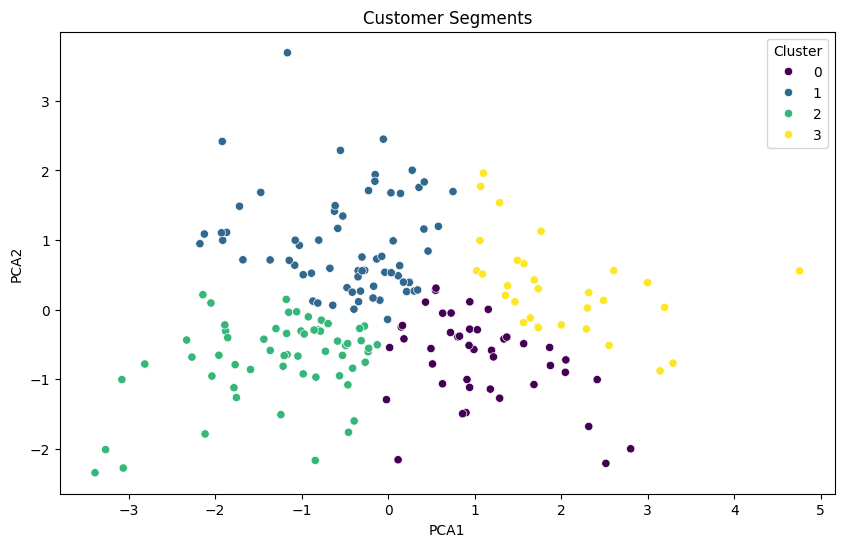

In [14]:
# Use PCA to reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(customer_features[numeric_features])
customer_features['PCA1'] = pca_result[:, 0]
customer_features['PCA2'] = pca_result[:, 1]

# Plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_features, x='PCA1', y='PCA2', hue='Cluster', palette='viridis')
plt.title("Customer Segments")
plt.show()

In [15]:
# Save results to CSV
customer_features.to_csv("FirstName_LastName_Clustering.csv", index=False)